Importing Necessary Libraries 

In [6]:
import tweepy,re
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [7]:
# authentication
# these are my credentials for authentication from developers app(https://developer.twitter.com/en/portal/projects/1496233127722860552/apps/23469414/keys)
consumerKey = 'Xd8sONHrOM0iEq98zx7MKGoU2'
consumerSecret = 'XTC374wBkLPjPFvCsXDgOfbBl9njwOPQ3l0Dbq2CF34ust5J8s'
accessToken = '1490710778860777474-IStEjWn7Vkqavam06SbkgyoITz83l2'
accessTokenSecret = 'fFvlUuROEBJBBtTNhIZCZ8LlXAneDvIRHMnp8CFRTZFiK'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [8]:
# input for term to be searched and how many tweets to search
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))

tweets = []
tweetText = []
# searching for tweets
tweets = tweepy.Cursor(api.search_tweets, q=searchTerm+" -filter:retweets", lang = "en").items(NoOfTerms)

In [9]:
tweet_list = [tweet.text for tweet in tweets]
tweet_df = pd.DataFrame(tweet_list)
tweet_df

,0
0,An 88/100 for Geology\n\nThis is one of those ...
1,@ThunderInvest @Ceecee_Freedmen @_SJPeace_ You...
2,"@ScottAdamsSays @Foldinginwards However, if a ..."
3,"@anakinsmybf @chaiteacookie YES, BECAUSE IM NO..."
4,100 years ago today. Hat tip to SAADA (S. Asia...
...,...
995,@tommywang3e @Jfromm1968_CRTD I see but there ...
996,@Techken_Tiff Nope! Now if it was finger tip e...
997,I legit hate the whole sneaker market now beca...
998,"@ask_aubry Wait - he can't cover $100, what a ..."


In [10]:
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)", " ", text).split())

tweet_df['cleaned_data'] = tweet_df[0].apply(clean_data)

In [11]:
tweet_df.head()

,0,cleaned_data
0,An 88/100 for Geology\n\nThis is one of those ...,An 88 100 for Geology This is one of those mom...
1,@ThunderInvest @Ceecee_Freedmen @_SJPeace_ You...,Freedmen SJPeace You 100 don t have a PhD sir ...
2,"@ScottAdamsSays @Foldinginwards However, if a ...",However if a physical mechanism is involved it...
3,"@anakinsmybf @chaiteacookie YES, BECAUSE IM NO...",YES BECAUSE IM NOT A PSYCHOPATH I MAY BE MENTA...
4,100 years ago today. Hat tip to SAADA (S. Asia...,100 years ago today Hat tip to SAADA S Asian A...


In [12]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(drop_numbers)

In [13]:
tweet_df.head()

,0,cleaned_data
0,An 88/100 for Geology\n\nThis is one of those ...,An for Geology This is one of those moments ...
1,@ThunderInvest @Ceecee_Freedmen @_SJPeace_ You...,Freedmen SJPeace You don t have a PhD sir I c...
2,"@ScottAdamsSays @Foldinginwards However, if a ...",However if a physical mechanism is involved it...
3,"@anakinsmybf @chaiteacookie YES, BECAUSE IM NO...",YES BECAUSE IM NOT A PSYCHOPATH I MAY BE MENTA...
4,100 years ago today. Hat tip to SAADA (S. Asia...,years ago today Hat tip to SAADA S Asian Amer...


In [14]:
# changing all the words of the reviews column to lowercase letters
def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lower_case)

In [17]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/elbrusgasimov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/elbrusgasimov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/elbrusgasimov/nltk_data...


True

In [18]:
lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lemmatise)

In [19]:
tweet_df['cleaned_data'].values

array(['an for geology this is one of those moment where i m forced to come to grip with the fact that i would ve',
       'freedman sjpeace you don t have a phd sir i can tell you re dumb by your tweet amp',
       'however if a physical mechanism is involved it will show where rigorous demand is',
       'yes because im not a psychopath i may be mentally ill in other way but psychopathy is not one of then',
       'year ago today hat tip to saada s asian american digital archive whose mission is to gather and tell the s',
       'herzig is a long standing clinic performing thousand',
       'ya go join them hero comrade hurry before all the glory is taken rush to the fron',
       'the sea eagle are richer pre season ladder',
       'let s take a trip down memory lane here s your free ticket to ride dj turntable ty go digging in his crate to',
       'page in and while i know how important it is to know this i don t think any other book ha left me a psychi',
       'hi if you are exp

In [20]:
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(remove_stopword)

In [21]:
tweet_df['cleaned_data'].values

array(['geology one moment forced come grip fact would',
       'freedman sjpeace phd sir tell dumb tweet amp',
       'however physical mechanism involved show rigorous demand',
       'yes im psychopath may mentally ill way psychopathy one',
       'year ago today hat tip saada asian american digital archive whose mission gather tell',
       'herzig long standing clinic performing thousand',
       'ya go join hero comrade hurry glory taken rush fron',
       'sea eagle richer pre season ladder',
       'let take trip memory lane free ticket ride dj turntable ty go digging crate',
       'page know important know think book ha left psychi',
       'hi experiencing issue kobo book try contact f',
       'first time ever agreed something ha said correct',
       'sea eagle richer pre season ladder',
       'find runner crowd chatroom acb nvax mrna cgc dkng aal save',
       'new bapes dont really violate tho nike dumb early bapes uptown since changed',
       'also russian troll war c

## Polarity of the Reviews

In [22]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol==0):
        return "Neutral"
    elif(pol>0 and pol<=0.3):
        return "Weakly Positive"
    elif(pol>0.3 and pol<=0.6):
        return "Positive"
    elif(pol>0.6 and pol<=1):
        return "Strongly Positive"
    elif(pol>-0.3 and pol<=0):
        return "Weakly Negative"
    elif(pol>-0.6 and pol<=-0.3):
        return "Negative"
    elif(pol>-1 and pol<=-0.6):
        return "Strongly Negative"
    
tweet_df['polarity'] = tweet_df['cleaned_data'].apply(get_polarity)

In [23]:
tweet_df['polarity'].value_counts()

Neutral              437
Weakly Positive      224
Positive             157
Weakly Negative       84
Negative              49
Strongly Positive     34
Strongly Negative     11
Name: polarity, dtype: int64

In [24]:
tweet_df.dtypes

0               object
cleaned_data    object
polarity        object
dtype: object

In [25]:
neutral = 0
wpositive = 0
spositive = 0
positive = 0
negative = 0
wnegative = 0
snegative = 0
polarity = 0

for i in range(0,70):
    textblob = TextBlob(str(tweet_df['cleaned_data'][i]))
    polarity+= textblob.sentiment.polarity
    pol = textblob.sentiment.polarity
    if (pol == 0):  # adding reaction of how people are reacting to find average later
        neutral += 1
    elif (pol > 0 and pol <= 0.3):
        wpositive += 1
    elif (pol > 0.3 and pol <= 0.6):
        positive += 1
    elif (pol > 0.6 and pol <= 1):
        spositive += 1
    elif (pol > -0.3 and pol <= 0):
        wnegative += 1
    elif (pol > -0.6 and pol <= -0.3):
        negative += 1
    elif (pol > -1 and pol <= -0.6):
        snegative += 1

In [26]:
# finding average reaction
polarity = polarity / NoOfTerms
polarity

0.008087748917748916

In [27]:
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

In [28]:
 # finding average of how people are reacting
positive = percentage(positive, NoOfTerms)
wpositive = percentage(wpositive, NoOfTerms)
spositive = percentage(spositive, NoOfTerms)
negative = percentage(negative, NoOfTerms)
wnegative = percentage(wnegative, NoOfTerms)
snegative = percentage(snegative, NoOfTerms)
neutral = percentage(neutral, NoOfTerms)

In [29]:
 # printing out data
print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
print()
print("-----------------------------------------------------------------------------------------")
print()
print("General Report: ")

if (polarity == 0):
    print("Neutral")
elif (polarity > 0 and polarity <= 0.3):
    print("Weakly Positive")
elif (polarity > 0.3 and polarity <= 0.6):
    print("Positive")
elif (polarity > 0.6 and polarity <= 1):
    print("Strongly Positive")
elif (polarity > -0.3 and polarity <= 0):
    print("Weakly Negative")
elif (polarity > -0.6 and polarity <= -0.3):
    print("Negative")
elif (polarity > -1 and polarity <= -0.6):
    print("Strongly Negative")

print()
print("------------------------------------------------------------------------------------------")
print()
print("Detailed Report: ")
print(str(positive) + "% people thought it was positive")
print(str(wpositive) + "% people thought it was weakly positive")
print(str(spositive) + "% people thought it was strongly positive")
print(str(negative) + "% people thought it was negative")
print(str(wnegative) + "% people thought it was weakly negative")
print(str(snegative) + "% people thought it was strongly negative")
print(str(neutral) + "% people thought it was neutral")

How people are reacting on 100 by analyzing 1000 tweets.

-----------------------------------------------------------------------------------------

General Report: 
Weakly Positive

------------------------------------------------------------------------------------------

Detailed Report: 
1.50% people thought it was positive
1.30% people thought it was weakly positive
0.40% people thought it was strongly positive
0.40% people thought it was negative
0.50% people thought it was weakly negative
0.00% people thought it was strongly negative
2.80% people thought it was neutral


In [30]:
sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]',
          'Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
          'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 
          'Strongly Negative [' + str(snegative) + '%]']

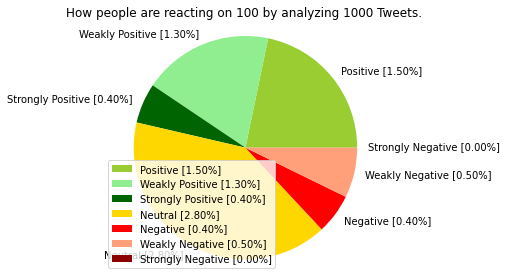

In [31]:
plt.pie(sizes, labels = labels, colors = colors)
plt.legend(labels, loc="best")
plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(NoOfTerms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()